In [1]:
import sys
import pandas as pd
import numpy as np

# Add the project root directory to Python path
project_root = r'c:\Users\pedro.hun\Documents\repos\option_monitor2'
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.orchestrators.df_creator import DFCreator
from src.orchestrators.single_expiry_fitting import SingleExpiry

In [2]:
df = DFCreator()
final_df = df.apply_greeks()

In [3]:
final_df

,bid,ask,lastPrice,Strike,openInterest,volume,ticker,Expiry,IV,SpotPrice,...,CalcIV,W,D1,D2,BSPrice,Vega,Theta,Rho,Delta,Gamma
151,0.04,0.05,0.05,34.22,1253600.0,128900.0,PETRK347,21/11/2025,0.264587,29.68,...,0.878579,0.067388,0.631103,0.371510,0.045,2.866799,-17.472135,1.654925,0.736013,0.042429
152,0.04,0.05,0.05,34.47,2290900.0,44200.0,PETRK350,21/11/2025,0.276222,29.68,...,0.927079,0.075034,0.638616,0.364694,0.045,2.853158,-18.206175,1.660446,0.738464,0.040018
153,0.03,0.04,0.03,34.72,2314300.0,4200.0,PETRK351,21/11/2025,0.261917,29.68,...,0.973202,0.082685,0.646786,0.359236,0.035,2.838215,-18.888983,1.667178,0.741115,0.037922
154,0.03,0.04,0.03,34.97,3445100.0,28100.0,PETRK447,21/11/2025,0.272484,29.68,...,1.020980,0.091003,0.654089,0.352422,0.035,2.824766,-19.596755,1.672491,0.743473,0.035976
155,0.02,0.03,0.03,35.22,3952600.0,51300.0,PETRK357,21/11/2025,0.282936,29.68,...,1.066407,0.099281,0.661970,0.346881,0.025,2.810154,-20.254336,1.678956,0.746005,0.034266
156,0.02,0.03,0.03,35.47,1794300.0,7000.0,PETRK359,21/11/2025,0.293236,29.68,...,1.113480,0.108240,0.669099,0.340101,0.025,2.796853,-20.936593,1.684090,0.748284,0.032662
157,0.02,0.03,0.03,35.72,3390300.0,2800.0,PETRK362,21/11/2025,0.303383,29.68,...,1.160204,0.117514,0.676169,0.333365,0.025,2.783585,-21.606200,1.689159,0.750533,0.031198
158,0.01,0.02,0.02,35.97,2897600.0,8500.0,PETRK408,21/11/2025,0.294075,29.68,...,1.204612,0.126682,0.683716,0.327792,0.015,2.769336,-22.227170,1.695302,0.752923,0.029894
159,0.01,0.02,0.02,36.22,583600.0,3200.0,PETRK367,21/11/2025,0.303535,29.68,...,1.250657,0.136552,0.690642,0.321112,0.015,2.756188,-22.872347,1.700218,0.755105,0.028656
160,0.01,0.02,0.02,36.47,646700.0,3000.0,PETRK369,21/11/2025,0.312881,29.68,...,1.296365,0.146716,0.697516,0.314481,0.015,2.743069,-23.505405,1.705074,0.757260,0.027514


In [4]:
# final_df = final_df[final_df["OptionType"] == "call"]

Found 13 options with 22 days to expiry
Moneyness range: -0.214 to -0.130
Initial guess for SVI parameters: [np.float64(0.06738823625527471), np.float64(2.6481372943360273), np.float64(0.5), np.float64(-0.13013541075116333), 0.05]


c:\Users\pedro.hun\Documents\repos\option_monitor2\src\core\interpolation_single_expiry\svi_redo.py:153: OptimizeWarning: Unknown solver options: ftol, gtol
  p0 = sop.minimize(obj_fun, x0=initial_guess, method=method, bounds=bounds, options={'maxiter':10000, 'ftol':1e-8, 'gtol':1e-7})
c:\Users\pedro.hun\Documents\repos\option_monitor2\src\core\interpolation_single_expiry\svi_redo.py:153: OptimizeWarning: Initial guess is not within the specified bounds
  p0 = sop.minimize(obj_fun, x0=initial_guess, method=method, bounds=bounds, options={'maxiter':10000, 'ftol':1e-8, 'gtol':1e-7})


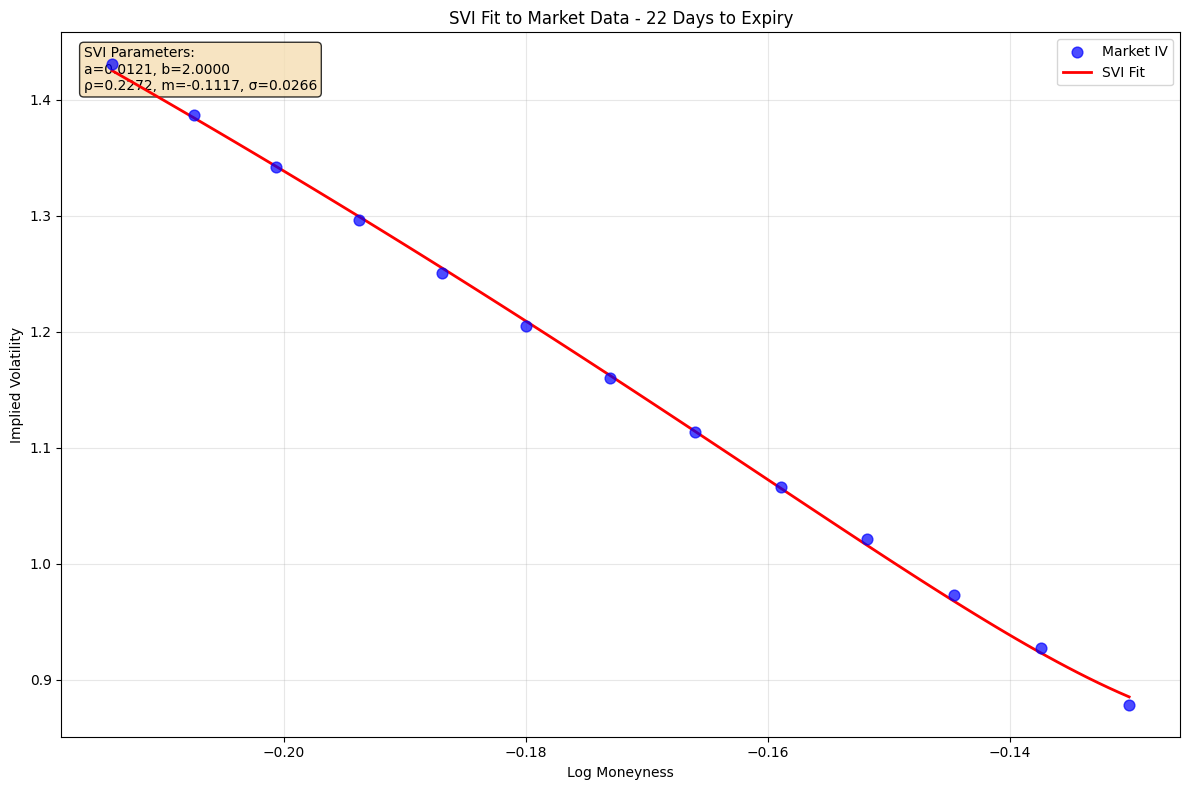

In [5]:
for x in final_df['TTE_days'].unique():
    fitting = SingleExpiry(days_to_expiry=x, df=final_df)
    fitting.plot_svi()